# Classification

## Boosting - XGBoost

- 뛰어난 성능
- GBM 대비 빠른 수행 시간(CPU 병렬 처리, GPU 지원)
- 다양한 성능 향상 기능

◼ 규제 (Regularization) 기능 탑재

◼ Tree Pruning(Node들을 다 만들었다가 leaf node부터 다시 검증하여 pruning)
: leaf node가 overfitting 을 반영한다고 보고 penalty를 부여하는 등의 방식을 통해 가지치기
- 다양한 편의 기능

◼ EarlyStopping : 수행 속도 감소 및 overfitting 방지

◼ 내장된 교차 검증

◼ 결측값 자체 처리


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

from sklearn.tree import export_graphviz
warnings.filterwarnings('ignore')

dataset = load_wine()
X_features = dataset.data
y_label = dataset.target

wine_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
wine_df['target'] = y_label
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [2]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


print(dataset.target_names)
print(wine_df['target'].value_counts())

In [3]:
wine = load_wine()
wine.keys()

wine_pd = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=wine['feature_names'] + ['target'])
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42) # 8 : 2
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


* XGBoost에서 Input 값으로 사용 위해 train, test set을 DMatrix로 변환

In [4]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

* 하이퍼 파라미터 설정

In [5]:
params = { 'max_depth':3,
           'eta': 0.1, # Learning Rate
           'objective':'multi:softmax', # 다중 분류
           'num_class': 3,
           'eval_metric':'mlogloss',
           'early_stoppings':100
        }
num_rounds = 150

* 주어진 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달하고 학습 

In [6]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’
wlist = [ (dtrain, 'train'), (dtest, 'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, evals = wlist )

[13:03:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:0.97301	eval-mlogloss:0.98561
[1]	train-mlogloss:0.86611	eval-mlogloss:0.88885
[2]	train-mlogloss:0.77496	eval-mlogloss:0.80796
[3]	train-mlogloss:0.69633	eval-mlogloss:0.73686
[4]	train-mlogloss:0.62601	eval-mlogloss:0.67307
[5]	train-mlogloss:0.56375	eval-mlogloss:0.61272
[6]	train-mlogloss:0.50942	eval-mlogloss:0.56015
[7]	train-mlogloss:0.46061	eval-mlogloss:0.51296
[8]	train-mlogloss:0.41674	eval-mlogloss:0.47134
[9]	train-mlogloss:0.37807	eval-mlogloss:0.43487
[10]	train-mlogloss:0.34355	eval-mlogloss:0.40217
[11]	train-mlogloss:0.31233	eval-mlogloss:0.37300
[12]	train-mloglo

In [7]:
pred_probs = xgb_model.predict(dtest) # 예측 확률 값
preds = np.round(pred_probs, 1)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
 
def get_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average = 'micro')
    recall = recall_score(y_test, pred, average = 'micro')
    f1 = f1_score(y_test,pred, average = 'micro')

    print(confusion) # Confusion Matrix 출력
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}".format(accuracy, precision, recall, f1))

In [9]:
get_eval(y_test, preds)

[[14  0  0]
 [ 0 14  0]
 [ 0  1  7]]
정확도: 0.9722, 정밀도: 0.9722, 재현율: 0.9722, F1: 0.9722


## Boosting - LightGBM

- XGBoost 이후에 나와 XGBoost의 단점을 보완하고 성능을 높이는데 초점이 맞춰져 있다.
XGBoost 대비 장점
- 더 빠른 학습과 예측 수행 시간(수행 시간은 설왕설래가 있다.)

- 더 작은 메모리 사용량

- 카테고리형 feature의 자동 변환과 최적 변환. One-hot Encoding을 사용하지 않고도 카테고리형 feature를 최적으로 변환하고 이에 따른 노드 변환 수행

In [10]:
from lightgbm import LGBMClassifier

dataset = load_wine()
X_features = dataset.data
y_label = dataset.target

wine_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
wine_df['target'] = y_label

In [11]:
lgbm_wrapper = LGBMClassifier(n_estimators = 150)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's multi_logloss: 0.93247
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.826273
[3]	valid_0's multi_logloss: 0.737772
[4]	valid_0's multi_logloss: 0.660022
[5]	valid_0's multi_logloss: 0.589707
[6]	valid_0's multi_logloss: 0.537431
[7]	valid_0's multi_logloss: 0.488267
[8]	valid_0's multi_logloss: 0.442401
[9]	valid_0's multi_logloss: 0.407765
[10]	valid_0's multi_logloss: 0.372497
[11]	valid_0's multi_logloss: 0.343244
[12]	valid_0's multi_logloss: 0.319435
[13]	valid_0's multi_logloss: 0.297106
[14]	valid_0's multi_logloss: 0.276194
[15]	valid_0's multi_logloss: 0.256467
[16]	valid_0's multi_logloss: 0.239311
[17]	valid_0's multi_logloss: 0.222908
[18]	valid_0's multi_logloss: 0.209475
[19]	valid_0's multi_logloss: 0.197891
[20]	valid_0's multi_logloss: 0.185007
[21]	valid_0's multi_logloss: 0.175826
[22]	valid_0's multi_logloss: 0.163459
[23]	valid_0's multi_logloss: 0.153675
[24]	valid_0's multi_logloss: 0.143801
[25]	valid_0

In [12]:
get_eval(y_test, preds, pred_proba)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000


## Bagging - Random Forest

- 랜덤 포레스트는 다재 다능한 알고리즘이다. 빠른 수행 속도, 높은 예측 성능을 보인다.


- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 한다.


- 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고한다. (원본 데이터의 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimators = 3으로 하이퍼 파라미터를 부여하면 다음과 같이 데이터 서브 세트가 만들어진다.)


In [13]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


In [14]:
dataset = load_wine()
X_features = dataset.data
y_label = dataset.target

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_features, y_label, test_size=0.2, random_state = 42)

estimator = RandomForestClassifier()


estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
pred_probs = estimator.predict(X_test)[:1]
get_eval(y_test, preds, pred_probs)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000


지니 계수 : 다양성이 낮을수록(불평등 할수록) 균일도가 높다.
- 최종적으로 하나의 종류만 남아 있을 때가 균일도가 높다,

- petal length
- gini 지니계수
- samples 데이터 건수
- value = [] 
- 색깔이 진할수록 단일화 분류 값을 가지고 있다. 연하면 불확실성이 높다

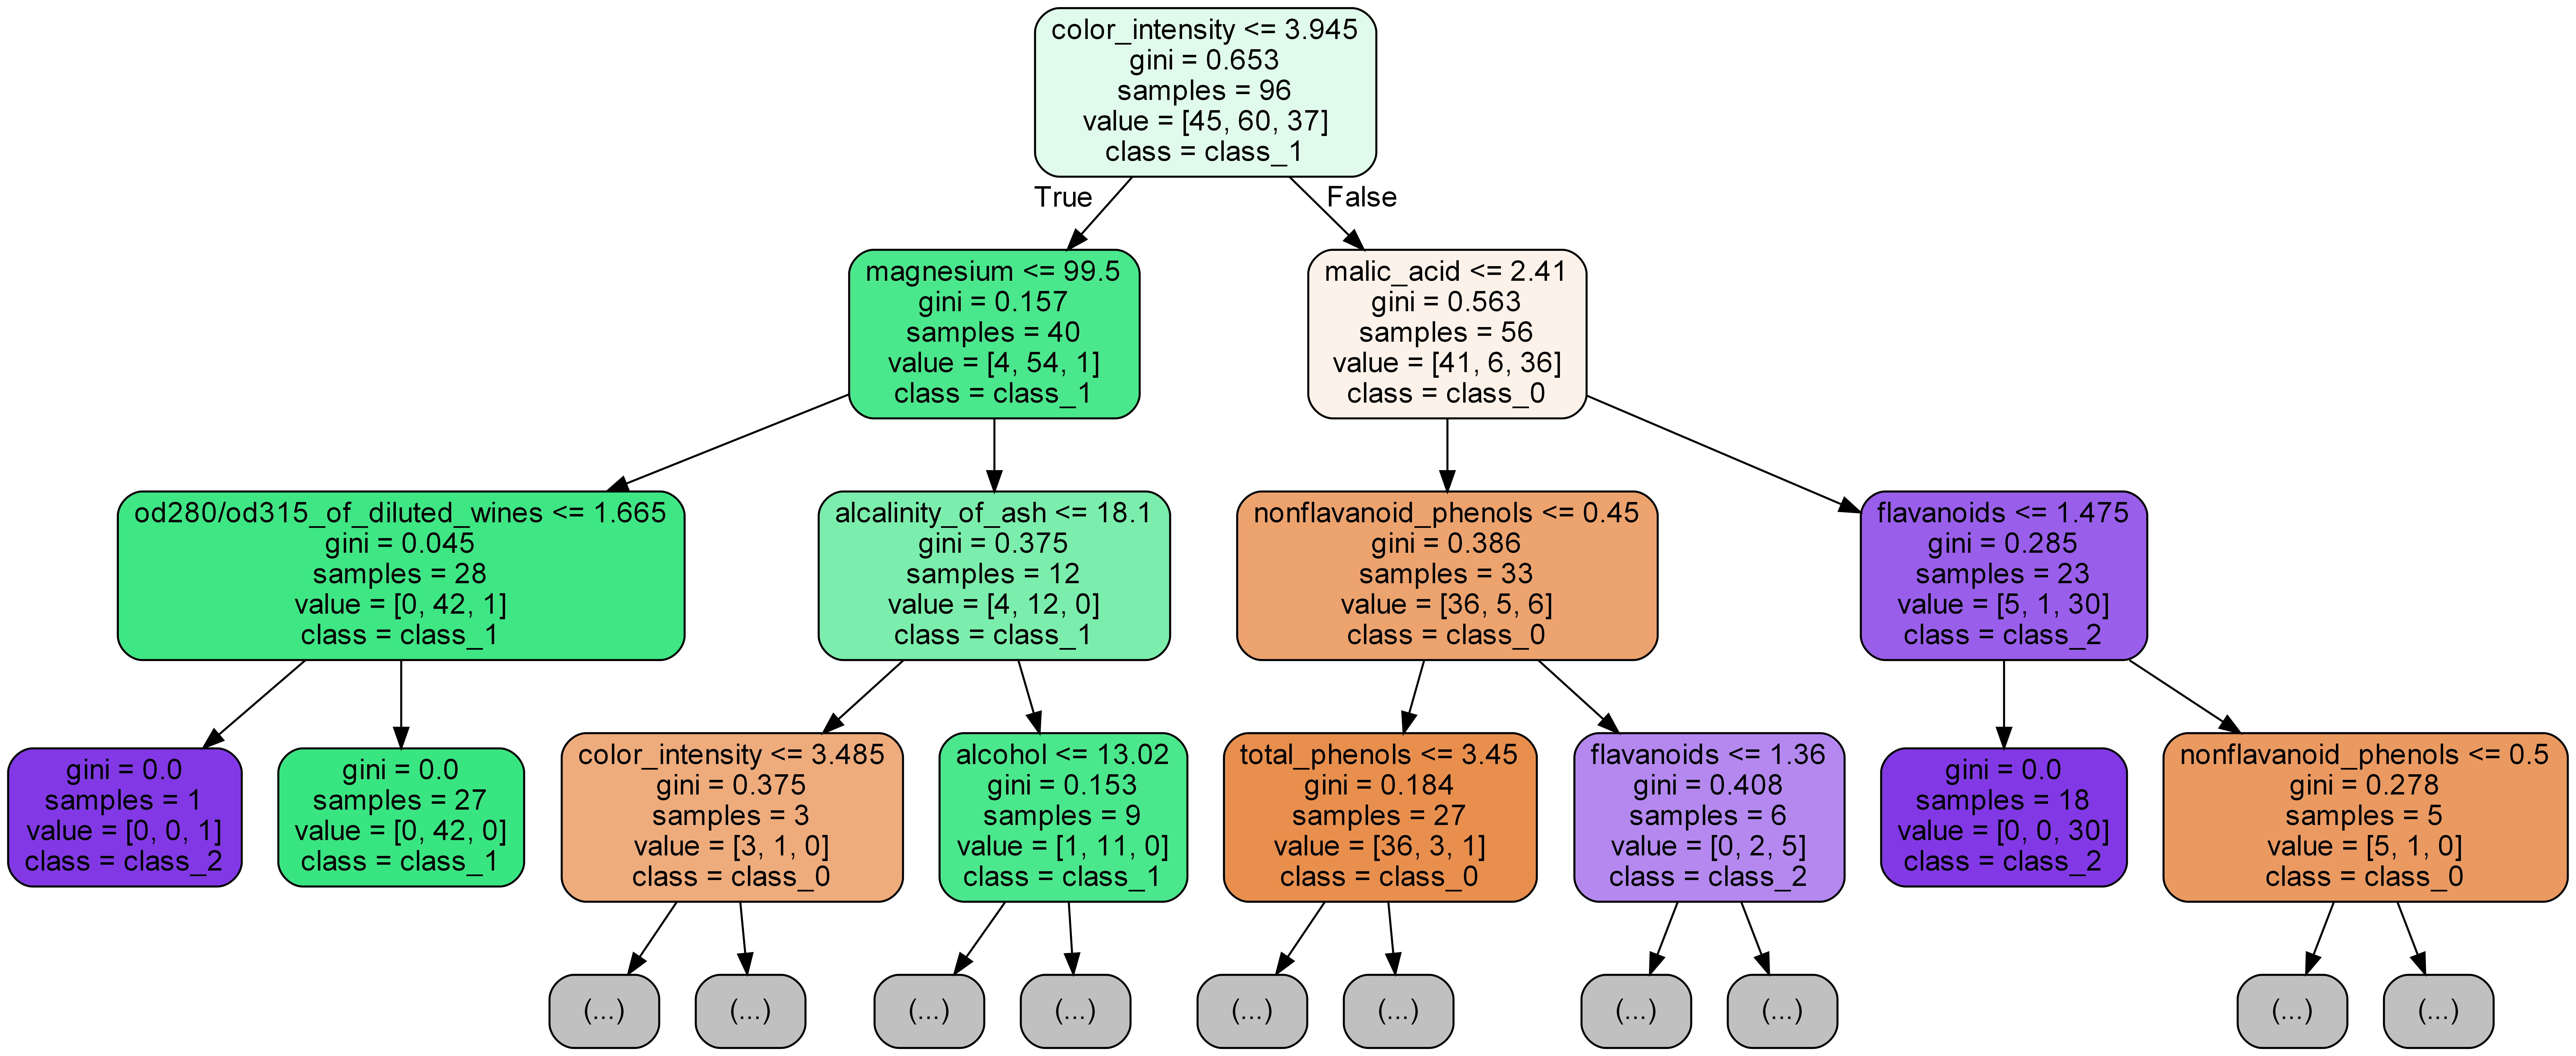

In [16]:
model = estimator.estimators_[3]
export_graphviz(model, out_file='tree.dot', 
                feature_names = dataset.feature_names,
                class_names = dataset.target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'RandomForest-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'RandomForest-tree.png')

Feature importances:
[0.109 0.03  0.014 0.032 0.034 0.045 0.163 0.018 0.024 0.159 0.081 0.159
 0.131]
alcohol : 0.109
malic_acid : 0.030
ash : 0.014
alcalinity_of_ash : 0.032
magnesium : 0.034
total_phenols : 0.045
flavanoids : 0.163
nonflavanoid_phenols : 0.018
proanthocyanins : 0.024
color_intensity : 0.159
hue : 0.081
od280/od315_of_diluted_wines : 0.159
proline : 0.131


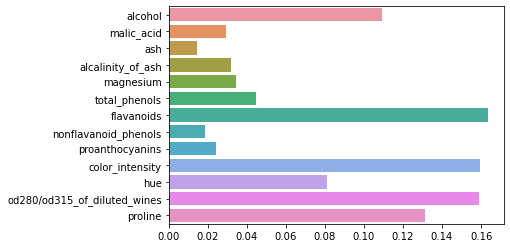

In [17]:
import seaborn as sns
%matplotlib inline

# feature importance
print("Feature importances:\n{0}".format(np.round(estimator.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(dataset.feature_names , estimator.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=estimator.feature_importances_ , y=dataset.feature_names)

## Decision Tree

- 쉽고 유연하게 적용 가능한 알고리즘이며, Scaling 이나 정규화 등의 사전 가공의 영향이 매우 적다. 하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수 있다.


- 이런 단점이 앙상블 기법에서는 오히려 장점으로 작용하는데, 앙상블은 매우 많은 여러 개의 약한 학습기(Weak Learner)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문이다.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

tree_clf = DecisionTreeClassifier(random_state=156)

dataset = load_wine()
X_train , X_test , y_train , y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)

tree_clf.fit(X_train , y_train)

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(tree_clf, out_file="tree.dot", class_names=dataset.target_names , \
feature_names = dataset.feature_names, impurity=True, filled=True)

Feature importances:
[0.019 0.    0.021 0.    0.    0.    0.411 0.    0.    0.385 0.    0.
 0.164]
alcohol : 0.019
malic_acid : 0.000
ash : 0.021
alcalinity_of_ash : 0.000
magnesium : 0.000
total_phenols : 0.000
flavanoids : 0.411
nonflavanoid_phenols : 0.000
proanthocyanins : 0.000
color_intensity : 0.385
hue : 0.000
od280/od315_of_diluted_wines : 0.000
proline : 0.164


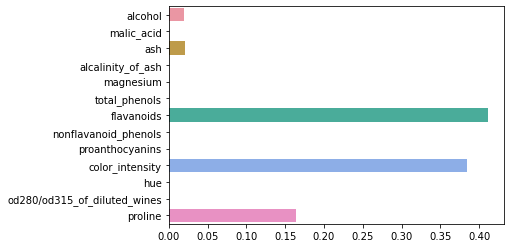

In [19]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(tree_clf.feature_importances_, 3)))

for name, value in zip(dataset.feature_names , tree_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
 
sns.barplot(x = tree_clf.feature_importances_ , y = dataset.feature_names)

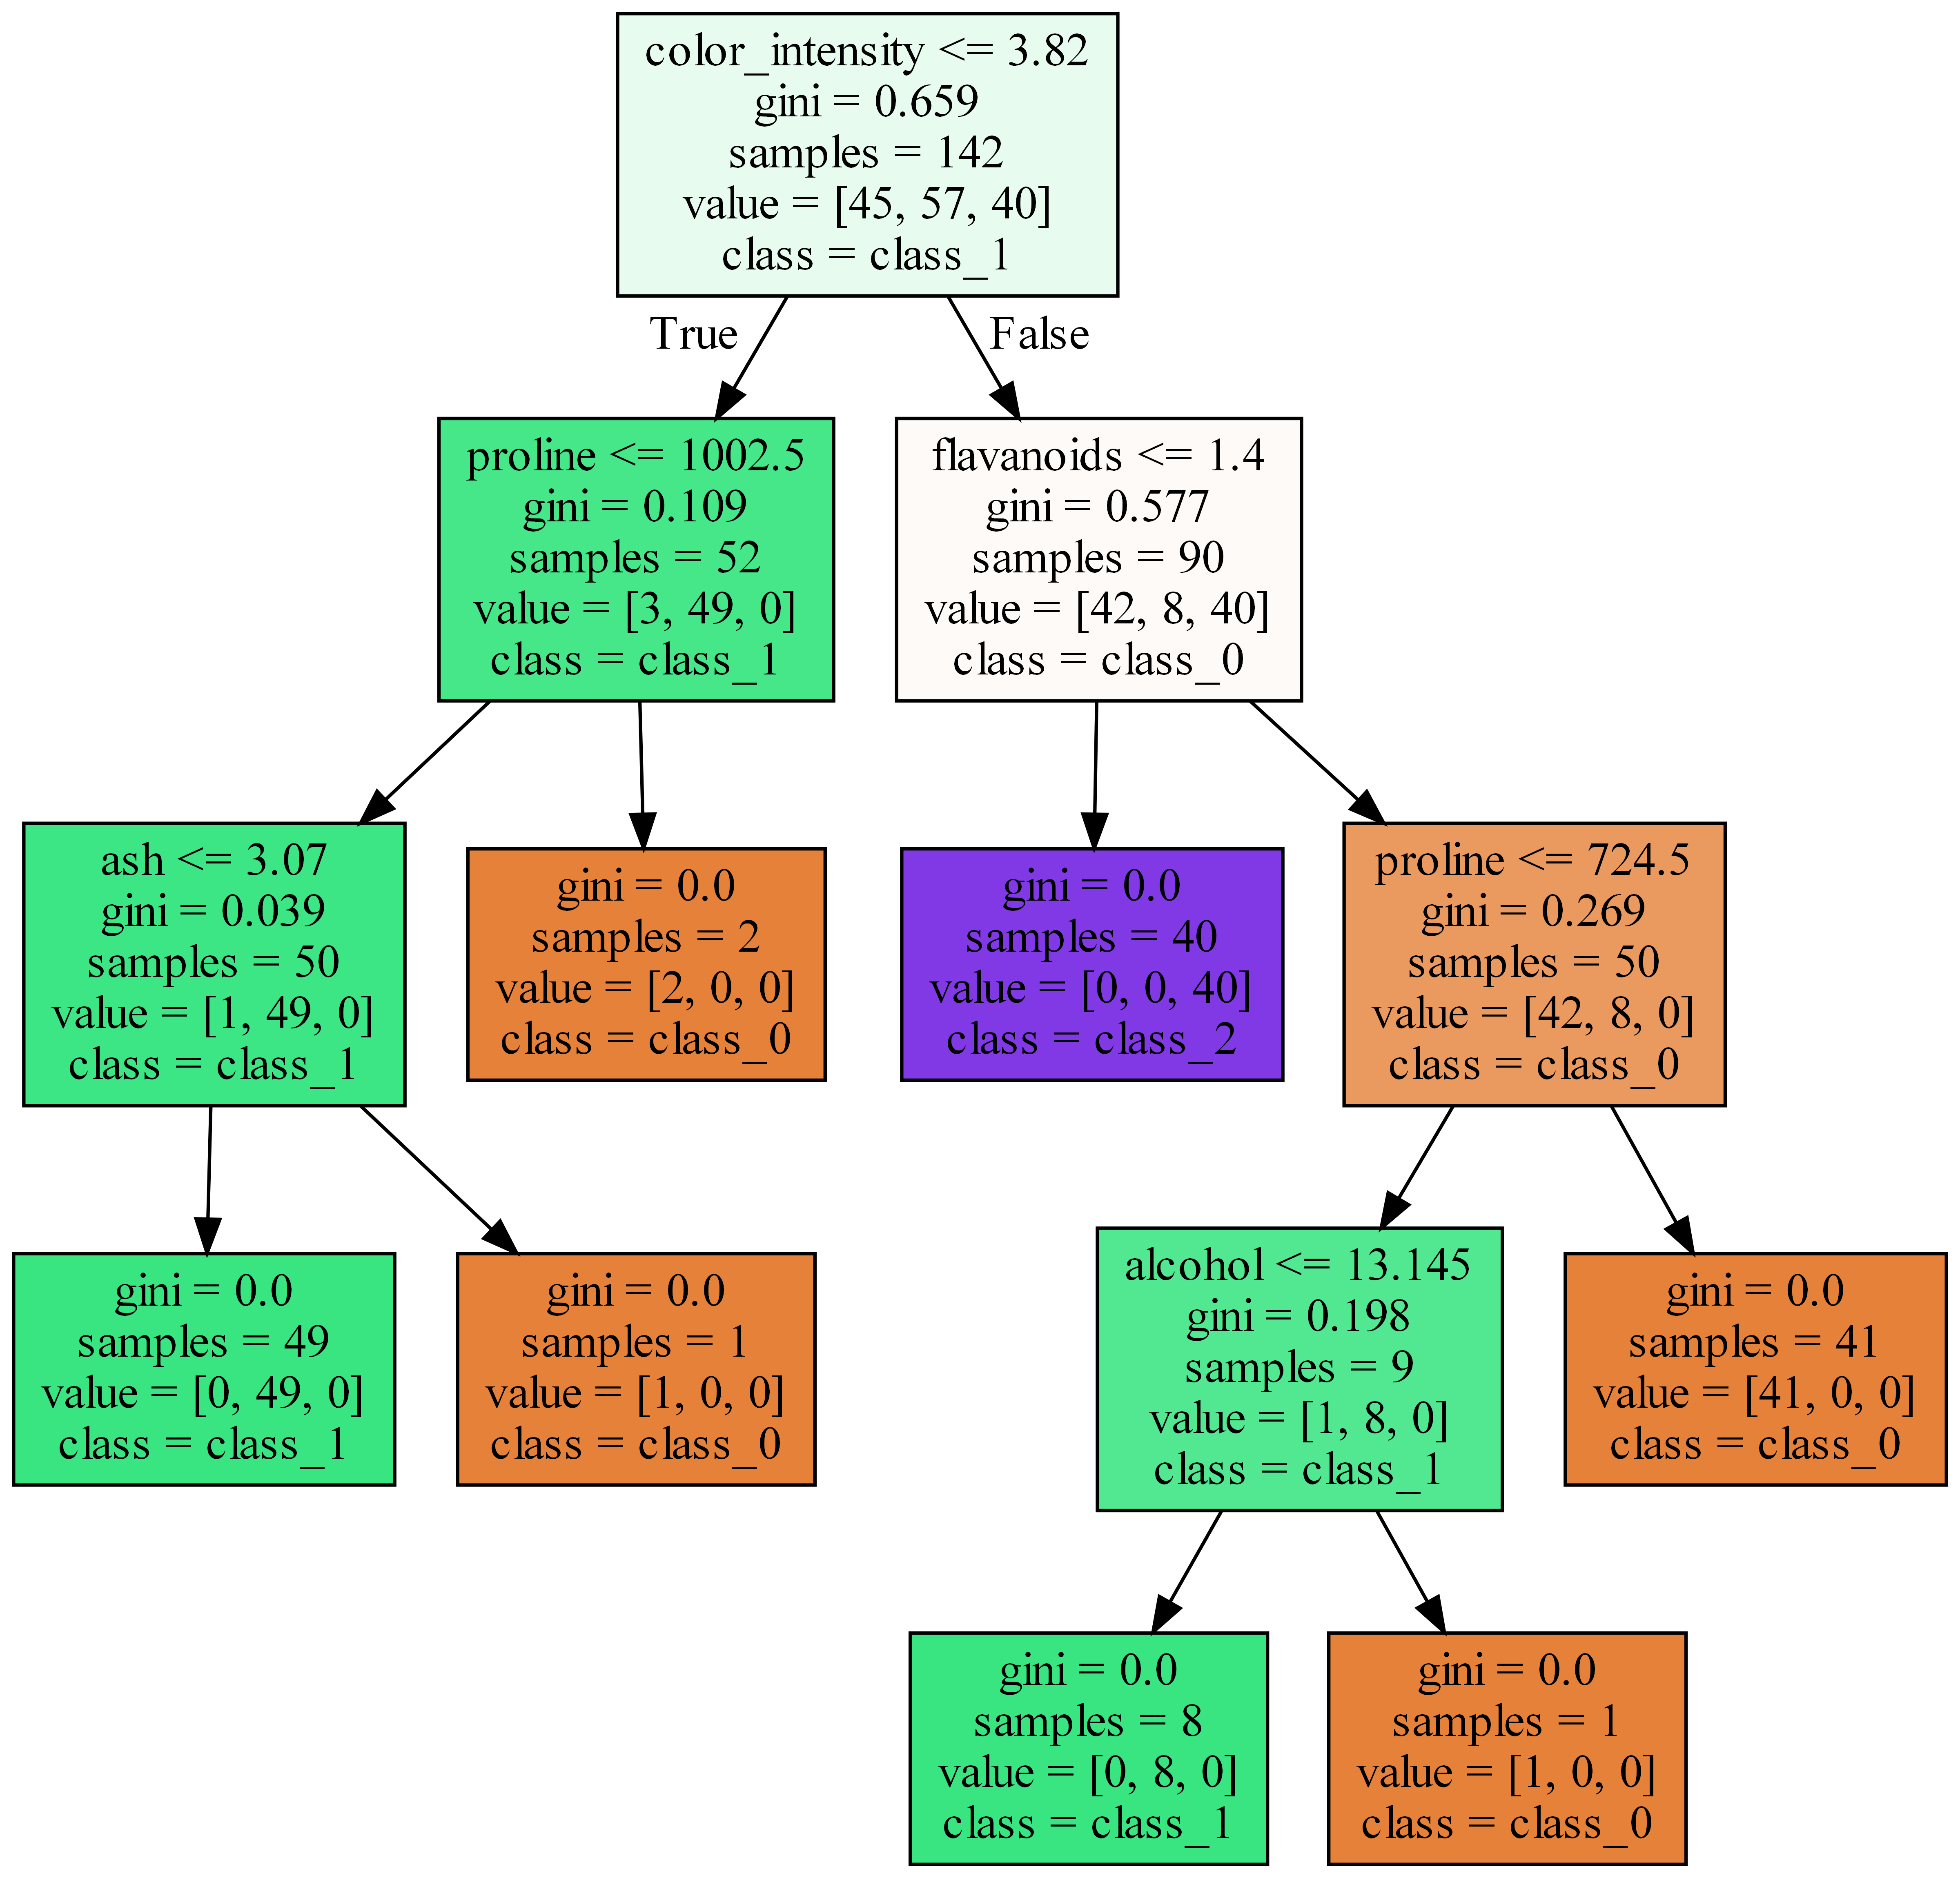

In [20]:
# .dot 파일로 export 해줍니다
export_graphviz(tree_clf, out_file='DecisionTree.dot',  
                feature_names = dataset.feature_names,
                class_names = dataset.target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded = True # 박스의 모양을 둥글게
               )

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
def get_dataset() :
    feature_names = dataset.feature_names

### Sample Data를 통한 2차원 시각화.

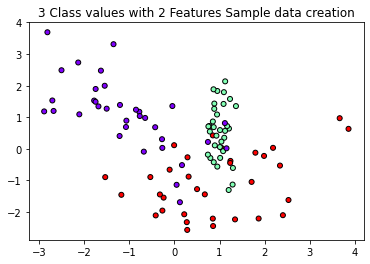

In [23]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [24]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

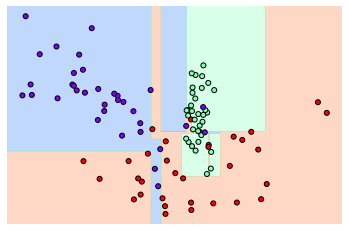

In [26]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 앙상블 학습

여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

앙상블의 유형
- 일반적으로는 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)으로 구분할 수 있으며, 이외에 스태킹(Stacking) 등의 기법이 있다.

- 대표적인 배깅은 랜덤 포레스트(Random Forest) 알고리즘이 있으며, 부스팅은 에이다 부스팅, 그래디언트 부스팅, XGBoost, LightGBM 등이 있다. 정형 데이터의 분류나 회귀에서는 GBM 부스팅계열의 앙상블이 전반적으로 높은 예측 성능을 나타낸다.

- 넓은 의미로는 서로 다른 모델을 결합한 것을 앙상블로 지칭하기도 한다.

앙상블의 특징

- 단일 모델의 약점을 다수의 모델을 결합하여 보완

- 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을섞는 것이 오히려 전체 성능에 도움이 될 수 있다.

- 랜덤 포레스트 및 뛰어난 부스팅 알고리즘은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용한다. (결정 트리의 단점인 Overfitting을 수십~수천 개의 많은 분류기를 결합해 보완하고 장점인직관적인 분류기준은 강화하는 방식으로 이용한다.)